# ASSIGNMENT:simple linear regression

In [214]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [215]:
# load dataset
delivery=pd.read_csv('delivery_time.csv')

In [216]:
# top 5 rows
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [217]:
# last 5 rows
delivery.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [218]:
#check a particular columns type
#delivery['Delivery'].dtype

In [219]:
# check types for all columns
delivery.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [220]:
# All the columns name
delivery.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [221]:
# number of rows and columns
delivery.shape

(21, 2)

In [222]:
# this command given numpy array without any index or columns names
delivery.values

array([[21.  , 10.  ],
       [13.5 ,  4.  ],
       [19.75,  6.  ],
       [24.  ,  9.  ],
       [29.  , 10.  ],
       [15.35,  6.  ],
       [19.  ,  7.  ],
       [ 9.5 ,  3.  ],
       [17.9 , 10.  ],
       [18.75,  9.  ],
       [19.83,  8.  ],
       [10.75,  4.  ],
       [16.68,  7.  ],
       [11.5 ,  3.  ],
       [12.03,  3.  ],
       [14.88,  4.  ],
       [13.75,  6.  ],
       [18.11,  7.  ],
       [ 8.  ,  2.  ],
       [17.83,  7.  ],
       [21.5 ,  5.  ]])

In [223]:
#command given Descriptive statistics for numerical columns only.
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [224]:
# Number of rows
delivery.count()

Delivery Time    21
Sorting Time     21
dtype: int64

In [225]:
# command given index dtype and column dtypes, non-null values and memory usage.
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [226]:
# Rename the columns name
delivery.rename(columns = {'Delivery Time':'Delivery','Sorting Time':'sorting'}, inplace = True)

<AxesSubplot:>

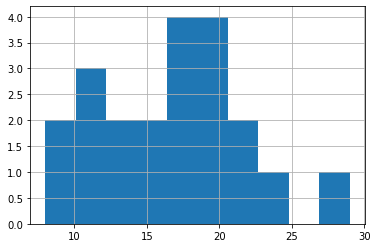

In [227]:
# Histogram 
delivery.Delivery.hist()

<AxesSubplot:>

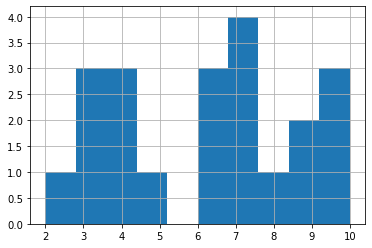

In [228]:
delivery.sorting.hist()

In [229]:
# Skewness
delivery.skew()

Delivery    0.352390
sorting     0.047115
dtype: float64

In [230]:
# NO duplicated rows in a dataset
delivery[delivery.duplicated()].shape

(0, 2)

D:\anacdona\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery', ylabel='Density'>

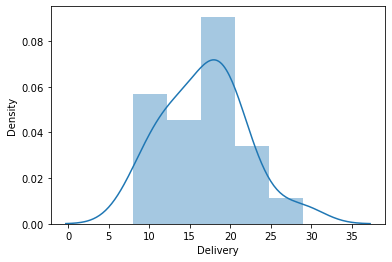

In [231]:
# Distplot
import seaborn as sns
sns.distplot(delivery['Delivery'])

D:\anacdona\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting', ylabel='Density'>

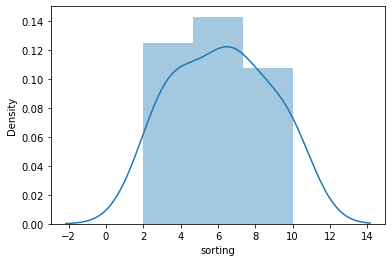

In [232]:
sns.distplot(delivery['sorting'])

# Outlier Detection And Treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x236b7c74c10>,
 'caps': [<matplotlib.lines.Line2D at 0x236b7c821f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x236b7c74a60>],
 'medians': [<matplotlib.lines.Line2D at 0x236b7c82790>],
 'fliers': [<matplotlib.lines.Line2D at 0x236b7c82a60>],
 'means': []}

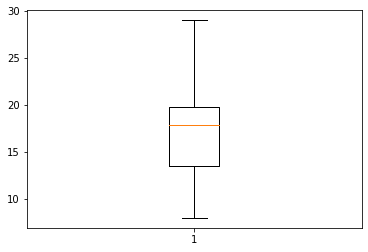

In [233]:
# Box plot
# The dataset does not contain outliers and has a normal distribution.
delivery1=delivery.Delivery
plt.boxplot(delivery1)

From above boxplot their is no outlier.
Data is slightly left skewed.
Most of the data is between 14 to 20 and mean is 18

{'whiskers': [<matplotlib.lines.Line2D at 0x236b7cd58e0>,
 'caps': [<matplotlib.lines.Line2D at 0x236b7cd5eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x236b7cc74c0>],
 'medians': [<matplotlib.lines.Line2D at 0x236b7ce2490>],
 'fliers': [<matplotlib.lines.Line2D at 0x236b7ce2760>],
 'means': []}

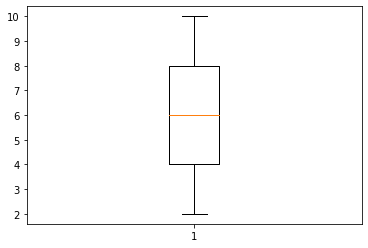

In [234]:
delivery1=delivery.sorting
plt.boxplot(delivery1)

From above boxplot thier is no outlier.
Data is normally distributed
Most of the data is between 4 to 8 and mean is 6

In [235]:
delivery.corr()
# There is a descent correlation between sorting time and delivery time


,Delivery,sorting
Delivery,1.000000,0.825997
sorting,0.825997,1.000000


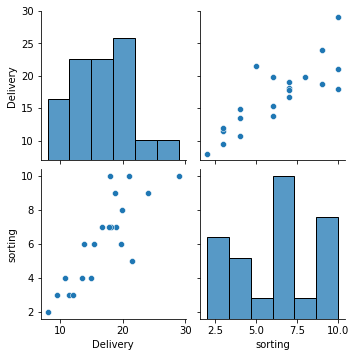

In [236]:
sns.pairplot(delivery)
#There is good linear relation.

Construct a model without applying any transformation - Linear model

<AxesSubplot:xlabel='sorting', ylabel='Delivery'>

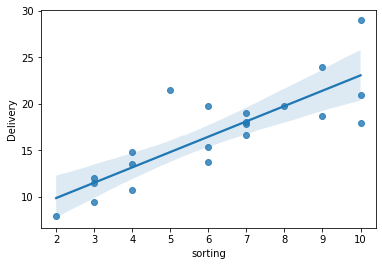

In [238]:
import statsmodels.formula.api as smf
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
#ols full form ordinary least square
model=smf.ols('Delivery~sorting',data=delivery).fit()
sns.regplot(x='sorting', y='Delivery', data=delivery)

In [239]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        16:43:27   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [240]:
# coefficient
model.params

Intercept    6.582734
sorting      1.649020
dtype: float64

In [241]:
# t and p-value
model.tvalues , model.pvalues

(Intercept    3.823349
 sorting      6.387447
 dtype: float64,
 Intercept    0.001147
 sorting      0.000004
 dtype: float64)

In [242]:
#  Rsquared Values
model.rsquared , model.rsquared_adj


(0.6822714748417231, 0.6655489208860244)

Constructing a Log Transformation on the independent variables

<AxesSubplot:xlabel='sorting', ylabel='Delivery'>

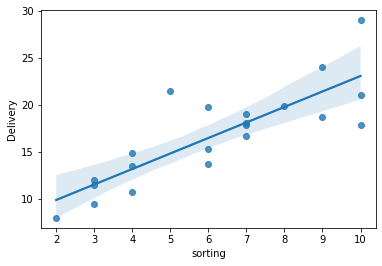

In [243]:
model1 = smf.ols('Delivery~np.log(sorting)', data = delivery).fit()
sns.regplot(x='sorting', y='Delivery', data=delivery)

In [244]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        16:43:28   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [245]:
# coefficient
model1.params

Intercept          1.159684
np.log(sorting)    9.043413
dtype: float64

In [246]:
# t and p-value
model1.tvalues , model1.pvalues

(Intercept          0.472460
 np.log(sorting)    6.586789
 dtype: float64,
 Intercept          0.641980
 np.log(sorting)    0.000003
 dtype: float64)

In [247]:
#  Rsquared Values
model1.rsquared , model1.rsquared_adj


(0.6954434611324223, 0.6794141696130761)

Constructing a Exponential Transformation on the independent variables

<AxesSubplot:xlabel='sorting', ylabel='Delivery'>

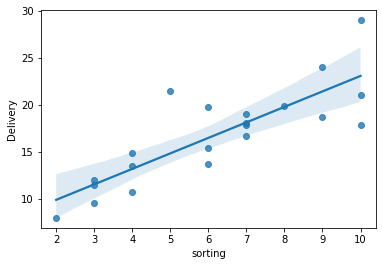

In [248]:
model2 = smf.ols('Delivery~np.exp(sorting)', data = delivery).fit()
sns.regplot(x='sorting', y='Delivery', data=delivery)

In [249]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Wed, 01 Mar 2023   Prob (F-statistic):            0.00396
Time:                        16:43:29   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(sorting)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [250]:
# coefficient
model2.params

Intercept          15.083578
np.exp(sorting)     0.000393
dtype: float64

In [251]:
# t and p-value
model2.tvalues , model2.pvalues

(Intercept          14.406456
 np.exp(sorting)     3.277108
 dtype: float64,
 Intercept          1.117304e-11
 np.exp(sorting)    3.964511e-03
 dtype: float64)

In [252]:
#  Rsquared Values
model2.rsquared , model2.rsquared_adj


(0.3611177022709089, 0.3274923181799041)

 Constructing a new model, by applying a Reciprocal transformation

<AxesSubplot:xlabel='sorting', ylabel='Delivery'>

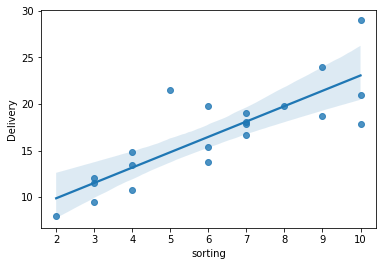

In [253]:
model3 = smf.ols('Delivery~np.reciprocal(sorting)', data = delivery).fit()
sns.regplot(x='sorting', y='Delivery', data=delivery)

In [254]:
model3.summary()

D:\anacdona\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                nan
Time:                        16:43:30   Log-Likelihood:                -63.396
No. Observations:                  21   AIC:                             128.8
Df Residuals:                      20   BIC:                             129.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 16.7910      1.107     15.162      0.000      14.481      19.101
np.reciprocal(sorting)          0          0        nan        nan           0           0
==============================================================================
Omnibus:                        0.864   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.374
Skew:                           0.327   Prob(JB):                        0.829
Kurtosis:                       2.974   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [255]:
# coefficient
model3.params

Intercept                 16.790952
np.reciprocal(sorting)     0.000000
dtype: float64

In [256]:
# t and p-value
model3.tvalues , model3.pvalues

(Intercept                 15.162032
 np.reciprocal(sorting)          NaN
 dtype: float64,
 Intercept                 1.973651e-12
 np.reciprocal(sorting)             NaN
 dtype: float64)

In [257]:
#  Rsquared Values
model3.rsquared , model3.rsquared_adj


(0.0, 0.0)

Construct a new model by applying a squareroot transformation

<AxesSubplot:xlabel='sorting', ylabel='Delivery'>

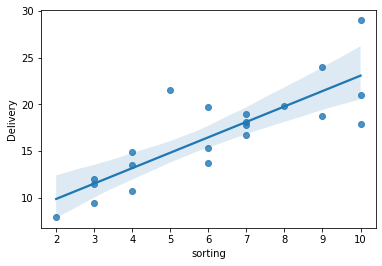

In [258]:
model4 = smf.ols('Delivery~np.sqrt(sorting)', data = delivery).fit()
sns.regplot(x='sorting', y='Delivery', data=delivery)

In [259]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.61e-06
Time:                        16:43:30   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(sorting)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
# coefficient
model4.params

Intercept          -2.518837
np.sqrt(sorting)    7.936591
dtype: float64

In [261]:
# t and p-value
model4.tvalues , model4.pvalues

(Intercept          -0.840911
 np.sqrt(sorting)    6.592434
 dtype: float64,
 Intercept           0.410857
 np.sqrt(sorting)    0.000003
 dtype: float64)

# Predict for new data point

In [262]:
newdata=pd.Series([10,4])

In [263]:
data_pred=pd.DataFrame(newdata,columns=['sorting'])
data_pred  

,sorting
0,10
1,4


In [264]:
model4.predict(data_pred)

0    22.578867
1    13.354345
dtype: float64

In [313]:
deli=model4.predict(delivery['sorting'])
deli

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [312]:
sor=delivery['Delivery']
sor

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery, dtype: float64

In [314]:
#MAE
from sklearn.metrics import mean_absolute_error

In [315]:
rmse=np.sqrt(mean_absolute_error(sor,deli))
print(rmse)

1.4308483778095977


Conclusion:
Comparing between all models , model4 has higher R-squared value i.e. 0.696 as comapare to others.
From the above data we know higher R-squred value and lower RMSE value gives better model.
Hence the model4 is better model to predict delivery_time

In [265]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [266]:
## load dataset
data=pd.read_csv("Salary_Data.csv")

In [267]:
# top 5 rows
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [268]:
# last 5 rows
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [269]:
# check types for all columns
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [270]:
# number of rows and column
data.shape

(30, 2)

In [271]:
# this command given numpy array without any index or columns names
data.values

array([[1.10000e+00, 3.93430e+04],
       [1.30000e+00, 4.62050e+04],
       [1.50000e+00, 3.77310e+04],
       [2.00000e+00, 4.35250e+04],
       [2.20000e+00, 3.98910e+04],
       [2.90000e+00, 5.66420e+04],
       [3.00000e+00, 6.01500e+04],
       [3.20000e+00, 5.44450e+04],
       [3.20000e+00, 6.44450e+04],
       [3.70000e+00, 5.71890e+04],
       [3.90000e+00, 6.32180e+04],
       [4.00000e+00, 5.57940e+04],
       [4.00000e+00, 5.69570e+04],
       [4.10000e+00, 5.70810e+04],
       [4.50000e+00, 6.11110e+04],
       [4.90000e+00, 6.79380e+04],
       [5.10000e+00, 6.60290e+04],
       [5.30000e+00, 8.30880e+04],
       [5.90000e+00, 8.13630e+04],
       [6.00000e+00, 9.39400e+04],
       [6.80000e+00, 9.17380e+04],
       [7.10000e+00, 9.82730e+04],
       [7.90000e+00, 1.01302e+05],
       [8.20000e+00, 1.13812e+05],
       [8.70000e+00, 1.09431e+05],
       [9.00000e+00, 1.05582e+05],
       [9.50000e+00, 1.16969e+05],
       [9.60000e+00, 1.12635e+05],
       [1.03000e+01,

In [272]:
#command given Descriptive statistics for numerical columns only.
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [273]:
# command given index dtype and column dtypes, non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [274]:
# Rename the columns name
#data.rename(columns = {' YearsExperience':'year','Salary':'Salar'}, inplace = True)

<AxesSubplot:>

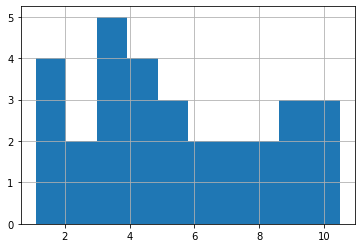

In [275]:
# Histogram 
data.YearsExperience.hist()

<AxesSubplot:>

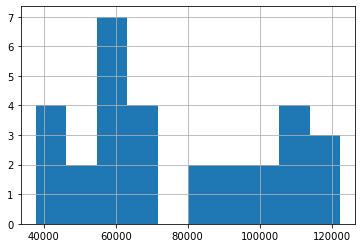

In [276]:
data.Salary.hist()

In [277]:
# Skewness
data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [278]:
# NO duplicated rows in a dataset
data[data.duplicated()].shape

(0, 2)

D:\anacdona\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

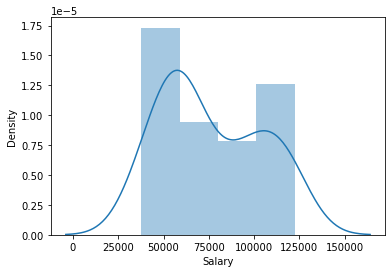

In [279]:
# Distplot
import seaborn as sns
sns.distplot(data['Salary'])

D:\anacdona\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

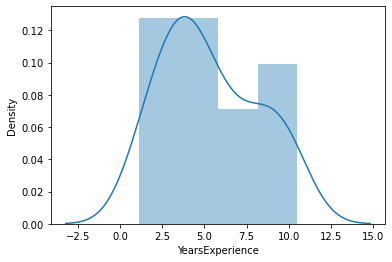

In [280]:
sns.distplot(data['YearsExperience'])


# Outlier Detection And Treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x236b83c5460>,
 'caps': [<matplotlib.lines.Line2D at 0x236b83c5a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x236b83c5190>],
 'medians': [<matplotlib.lines.Line2D at 0x236b83c5fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x236b83d22b0>],
 'means': []}

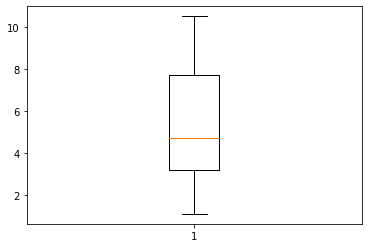

In [281]:
# Box plot
# The dataset does not contain outliers and has a normal distribution.
data1=data.YearsExperience
plt.boxplot(data1)

from above boxplot thier is no outlier.
Data is slightly right skewed.
Most of the data is between 3 to 7 and median is 5

{'whiskers': [<matplotlib.lines.Line2D at 0x236b8428100>,
 'caps': [<matplotlib.lines.Line2D at 0x236b84286a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x236b8419df0>],
 'medians': [<matplotlib.lines.Line2D at 0x236b8428c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x236b8428f10>],
 'means': []}

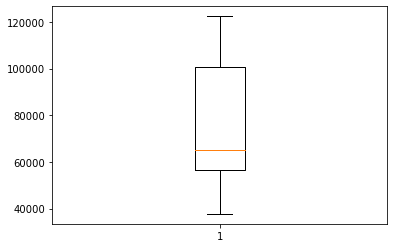

In [282]:
data1=data.Salary
plt.boxplot(data1)

from above boxplot thier is no outlier.
Data is slightly right skewed.
Majority of the data is between 50000 to 100000 and mean is around 65000

In [283]:
data.corr()
# There is a descent correlation between YearsExperience and Salary


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


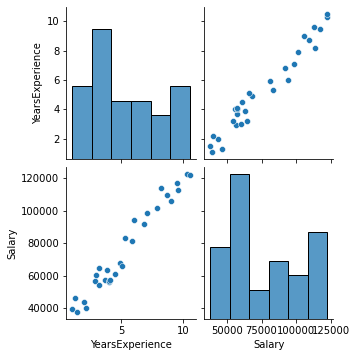

In [284]:
sns.pairplot(data)
#There is good linear relation.

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

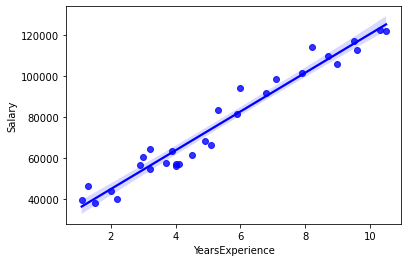

In [285]:
sns.regplot(x="YearsExperience", y="Salary", data=data, color='blue') #Great Linear relationship is clearly visible

Construct a model without applying any transformation - Linear model

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

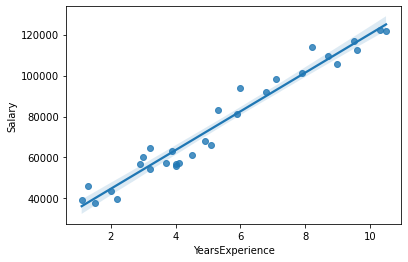

In [328]:
import statsmodels.formula.api as smf
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
model6=smf.ols('Salary~YearsExperience',data=data).fit()
sns.regplot(x='YearsExperience', y='Salary', data=data)

In [287]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        16:43:37   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
# coefficient
model6.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [289]:
# t and p-value
model6.tvalues , model6.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [290]:
#  Rsquared Values
model6.rsquared , model6.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

Constructing a Log Transformation on the independent variables

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

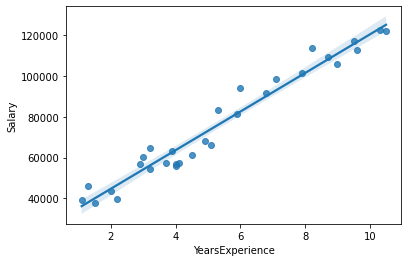

In [329]:
model7 = smf.ols('Salary~np.log(YearsExperience)', data = data).fit()
sns.regplot(x='YearsExperience', y='Salary', data=data)

In [292]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                        16:43:38   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
# coefficient
model7.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [294]:
# t and p-value
model7.tvalues , model7.pvalues

(Intercept                   2.895135
 np.log(YearsExperience)    12.791989
 dtype: float64,
 Intercept                  7.268813e-03
 np.log(YearsExperience)    3.250155e-13
 dtype: float64)

In [295]:
#  Rsquared Values
model7.rsquared , model7.rsquared_adj

(0.853888882875697, 0.8486706286926862)

Constructing a new model by applying Exponential transformation

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

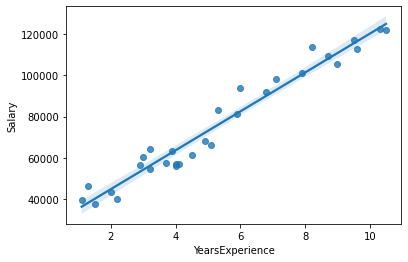

In [330]:
model8 = smf.ols('Salary~np.exp(YearsExperience)', data = data).fit()
sns.regplot(x='YearsExperience', y='Salary', data=data)

In [297]:
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           2.72e-05
Time:                        16:43:39   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YearsExperience)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [298]:
# coefficient
model8.params

Intercept                  67568.624969
np.exp(YearsExperience)        2.136040
dtype: float64

In [299]:
# t and p-value
model8.tvalues , model8.pvalues

(Intercept                  16.620427
 np.exp(YearsExperience)     5.006889
 dtype: float64,
 Intercept                  4.888835e-16
 np.exp(YearsExperience)    2.721588e-05
 dtype: float64)

In [300]:
#  Rsquared Values
model8.rsquared , model8.rsquared_adj

(0.47238440560728734, 0.45354099152183325)

Constructing a new model, by applying a Reciprocal transformation

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

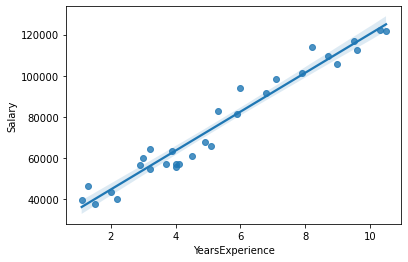

In [331]:
model9 = smf.ols('Salary~np.reciprocal(YearsExperience)', data = data).fit()
sns.regplot(x='YearsExperience', y='Salary', data=data)

In [302]:
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     40.06
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           7.58e-07
Time:                        16:43:39   Log-Likelihood:                -335.30
No. Observations:                  30   AIC:                             674.6
Df Residuals:                      28   BIC:                             677.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       1.043e+05   5533.996     18.842      0.000    9.29e+04    1.16e+05
np.reciprocal(YearsExperience) -1.036e+05   1.64e+04     -6.329      0.000   -1.37e+05   -7.01e+04
==============================================================================
Omnibus:                       10.284   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                2.740
Skew:                           0.290   Prob(JB):                        0.254
Kurtosis:                       1.638   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [303]:
# coefficient
model9.params

Intercept                         104273.335111
np.reciprocal(YearsExperience)   -103620.843905
dtype: float64

In [304]:
# t and p-value
model9.tvalues , model9.pvalues

(Intercept                         18.842323
 np.reciprocal(YearsExperience)    -6.329255
 dtype: float64,
 Intercept                         1.926358e-17
 np.reciprocal(YearsExperience)    7.581006e-07
 dtype: float64)

In [305]:
#  Rsquared Values
model9.rsquared , model9.rsquared_adj

(0.5885951068932687, 0.5739020749965996)

Construct a new model by applying a squareroot transformation

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

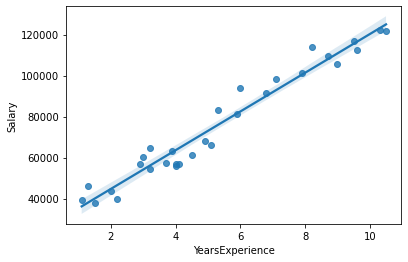

In [332]:
model10 = smf.ols('Salary~np.sqrt(YearsExperience)', data = data).fit()
sns.regplot(x='YearsExperience', y='Salary', data=data)

In [307]:
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           8.57e-18
Time:                        16:43:40   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(YearsExperience)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
# coefficient
model10.params

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64

In [309]:
# t and p-value
model10.tvalues , model10.pvalues

(Intercept                   -3.262308
 np.sqrt(YearsExperience)    19.437148
 dtype: float64,
 Intercept                   2.906965e-03
 np.sqrt(YearsExperience)    8.565358e-18
 dtype: float64)

In [310]:
#  Rsquared Values
model10.rsquared , model10.rsquared_adj

(0.9310009544993526, 0.9285367028743294)

# Predict for new data point

In [345]:
newdata1=pd.Series([1,7])

In [346]:
data_pred1=pd.DataFrame(newdata1,columns=['YearsExperience'])
data_pred1   

,YearsExperience
0,1
1,7


In [347]:
model6.predict(data_pred1)

0    35242.162520
1    91941.936449
dtype: float64

In [348]:
yrs=model6.predict(data['YearsExperience'])
yrs

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [349]:
sl=data['Salary']
sl

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [355]:
#MAE
from sklearn.metrics import mean_absolute_error

In [359]:
rmse=np.sqrt(mean_absolute_error(sl,yrs))
print(rmse)

68.14837701254181


In [360]:
mae=mean_absolute_error(sl, yrs)

In [361]:
mae

4644.2012894435375

Conclusion:
Comparing between all models , model has higher R-squared value i.e. 0.957 as comapare to others.
Hence the model is better model to predict salary